# Check processing of Master FlatsDM at CC

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : January 2022
- Last update : February 04 2022

**Kernel lsst_distrib_w_2021_44**

In [1]:
!pwd

/pbs/throng/lsst/users/dagoret/desc/AuxTelComm/notebookccdm/anaflats


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch

from astropy.io import fits

In [3]:
# Bokeh for interactive visualization
import bokeh
from bokeh.io import output_file, output_notebook, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, CDSView, GroupFilter, HoverTool
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

import holoviews as hv
from holoviews import streams, opts
from holoviews.operation.datashader import rasterize
from holoviews.operation.datashader import datashade, dynspread
from holoviews.plotting.util import process_cmap


import datashader as dsh

In [4]:
#! pip install holoview

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
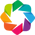

Loading BokehJS ...

In [5]:
# Set the holoviews plotting library to be bokeh
# You will see the holoviews + bokeh icons displayed when the library is loaded successfully
#hv.extension('bokeh')
hv.extension('bokeh', 'matplotlib')

# Display bokeh plots inline in the notebook
output_notebook()

In [6]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm/repos/w_2021_44/atmospec 	setup
eups                  LOCAL:/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2021_44/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.7.0-ext/eups 	setup
obs_lsst              LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm/repos/w_2021_44/obs_lsst 	setup
rapid_analysis        LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm/repos/w_2021_44/rapid_analysis 	setup


# Configuration

## Select flags options

In [7]:
FLAG_ROTATE_IMG = False

In [8]:
FLAG_TRANSFORM = False

## Transformations

astropy scale transformations

In [9]:
#transform = AsinhStretch() + PercentileInterval(99.)
transform = PercentileInterval(98.)

## Range in image flat values

In [10]:
VMIN = 0.5
VMAX = 1.5

## Histograms bins

In [11]:
NBINS_HISTO = 200

## Holoview Elements config

### Histogram config

In [12]:
HV_HISTO_SINGLE_WIDTH  = 400
HV_HISTO_SINGLE_HEIGHT = 350
HV_HISTO_MULTI_WIDTH  = 350
HV_HISTO_MULTI_HEIGHT = 300
HV_HISTO_MULTI_COLS   = 3

### image config

In [13]:
HV_IMAGE_SINGLE_WIDTH  = 400
HV_IMAGE_SINGLE_HEIGHT = 400
HV_IMAGE_SINGLE_FRAME_WIDTH = 600
HV_IMAGE_MULTI_WIDTH  = 400
HV_IMAGE_MULTI_HEIGHT = 400
HV_IMAGE_MULTI_FRAME_WIDTH = 350
HV_IMAGE_MULTI_COLS   = 3

# Flat path

In [14]:
#path_MasterFlats = "/sps/lsst/groups/auxtel/softs/shared/auxteldm/rerun/dagoret_jan22_flats/flat"
path_MasterFlats = "/sps/lsst/groups/auxtel/softs/shared/auxteldm/rerun/dagoret_fordispersers2022_01/flat"

#BG40~empty  FELH0600~empty  RG610~empty  SDSSg~empty  empty~empty  empty~holo4_003

## List of filters
-  BG40\~empty   - FELH0600\~empty  - RG610\~empty  - SDSSg\~empty  - empty\~empty  - empty\~holo4_003

In [15]:
list_of_flatfilters=os.listdir(path_MasterFlats)
list_of_flatfilters

['empty~holo4_003',
 'RG610~empty',
 'BG40~empty',
 'empty~empty',
 'SDSSg~empty',
 'FELH0600~empty']

# Select the filter -disperser combination

- use the index from the list above from 0 to 5

In [16]:
index = 0

In [17]:
path_MasterFlats_Filters =  list_of_flatfilters[index]
path_MasterFlats_Filters

'empty~holo4_003'

In [18]:
path_flats = os.path.join(path_MasterFlats,path_MasterFlats_Filters)
path_flats 

'/sps/lsst/groups/auxtel/softs/shared/auxteldm/rerun/dagoret_fordispersers2022_01/flat/empty~holo4_003'

In [19]:
path_flats_dates = os.listdir(path_flats) 
path_flats_dates

['2021-02-17']

In [20]:
path_flats_dates = sorted(path_flats_dates)

In [21]:
list_filename_flat     = []
list_fullfilename_flat = []

for thedate in path_flats_dates:
    path_theflat = os.path.join(path_flats,thedate)
    filename_flats = os.listdir(path_theflat)
    print(filename_flats)
    list_filename_flat.append( filename_flats[0])
    list_fullfilename_flat.append( os.path.join(path_theflat ,filename_flats[0]))

['flat_empty~holo4_003-det000_2021-02-17.fits']


In [22]:
NFlats = len(list_filename_flat)

In [23]:
list_fullfilename_flat 

['/sps/lsst/groups/auxtel/softs/shared/auxteldm/rerun/dagoret_fordispersers2022_01/flat/empty~holo4_003/2021-02-17/flat_empty~holo4_003-det000_2021-02-17.fits']

In [24]:
# choose the flat index
findex=0

In [25]:
full_filename_flat = list_fullfilename_flat[findex]
filename_flat = list_filename_flat[findex]
hdul_flat= fits.open(full_filename_flat)

In [26]:
hdul_flat.info()

Filename: /sps/lsst/groups/auxtel/softs/shared/auxteldm/rerun/dagoret_fordispersers2022_01/flat/empty~holo4_003/2021-02-17/flat_empty~holo4_003-det000_2021-02-17.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Segment10     1 PrimaryHDU     117   ()      
  1  IMAGE         1 CompImageHDU     22   (4072, 4000)   float32   
  2  MASK          1 CompImageHDU     30   (4072, 4000)   int32   
  3  VARIANCE      1 CompImageHDU     22   (4072, 4000)   float32   
  4  ARCHIVE_INDEX    1 BinTableHDU     41   0R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   


In [27]:
image=hdul_flat[1].data
#image=hdul_calexp[1].data

In [28]:
if FLAG_TRANSFORM: 
    scaledImage = transform(image)
else:
    scaledImage = image

In [29]:
if FLAG_ROTATE_IMG:
    rotscaledImage=np.rot90(scaledImage)
else:
    rotscaledImage = scaledImage

In [30]:
#from holoviews import streams
from holoviews.streams import Stream, param
listing = ', '.join(sorted([str(s.name) for s in param.descendents(streams.LinkedStream)]))
print('The linked stream classes supported by HoloViews are:\n\n{listing}'.format(listing=listing))

The linked stream classes supported by HoloViews are:

BoundsX, BoundsXY, BoundsY, BoxEdit, CDSStream, CurveEdit, DoubleTap, Draw, FreehandDraw, Lasso, LinkedStream, MouseEnter, MouseLeave, PanEnd, PlotReset, PlotSize, PointDraw, PointerX, PointerXY, PointerY, PolyDraw, PolyEdit, PressUp, RangeX, RangeXY, RangeY, SelectMode, Selection1D, SelectionXY, SingleTap, Tap


In [31]:
TOOLTIPS = [
    ('name', "$name"),
    ('index', "$index"),
    ('pattern', '@pattern'),
    ("x", "$x"),
    ("y", "$y"),
    ("value", "@image"),
    ('squared', '@squared')
]

TOOLTIPS = [
    ("(x,y)", "($x, $y)"),
]

hover = HoverTool(description='Custom Tooltip', tooltips=[('x', '@x'), ('y', '@y')])


# Custom hover tool for the source detections
myhover = HoverTool(
    tooltips=[
        ( 'x', '@x{0.2f}'),
        ( 'y', '@y{0.2f}'),
    ],
    formatters={
        'x' : 'printf',
        'y' : 'printf',
    },
    
)

In [32]:
# Define some default plot options for the Image
img_opts = dict(
                #height=600, width=700, 
                xaxis="bottom", 
                padding = 0.01, fontsize={'title': '8pt'},
                colorbar=True, toolbar='right', show_grid=True,
                aspect='equal',
                frame_width=HV_IMAGE_SINGLE_FRAME_WIDTH ,
                tools=['hover','crosshair','undo','redo','zoom_in','zoom_out'],
                #tools=[myhover,'crosshair'],
               )     

In [33]:
# Create the Image element.
bounds_img=(0,0,rotscaledImage.shape[1],rotscaledImage.shape[0])
img = hv.Image(rotscaledImage, bounds=bounds_img,
               kdims=['x', 'y']).opts(
    cmap = "Greys_r",  xlabel = 'x', ylabel ='y',
    title = filename_flat,clim=(VMIN,VMAX),
    **img_opts)

In [34]:
rasterize(img)

:DynamicMap   []
   :Image   [x,y]   (z)

## Histogram

In [35]:
data_flatten = image.ravel()

In [36]:
opts.Histogram(fill_color="#036564", axiswise=True, height=HV_HISTO_SINGLE_HEIGHT ,  width=HV_HISTO_SINGLE_WIDTH , bgcolor="#E8DDCB")

Options('Histogram', axiswise=True, bgcolor='#E8DDCB', fill_color='#036564', height=350, width=400)

In [37]:
frequencies, edges = np.histogram(data_flatten, bins=NBINS_HISTO, range=(VMIN,VMAX))
print('Values: %s, Edges: %s' % (frequencies.shape[0], edges.shape[0]))
layout = hv.Histogram((edges, frequencies))

Values: 200, Edges: 201


In [38]:
layout.opts(
    #opts.Histogram(fill_color="#036564", axiswise=True, height=350, width=600, bgcolor="#E8DDCB",logy=True),
    opts.Histogram(fill_color="#036564", axiswise=True, height=HV_HISTO_SINGLE_HEIGHT ,  width=HV_HISTO_SINGLE_WIDTH , bgcolor="#E8DDCB",title = filename_flat, tools=['hover','undo','redo','zoom_in','zoom_out']),
    opts.Layout(title="flat"))

:Histogram   [x]   (Frequency)

# All Flats for that combination of filter - disperser

## Images of flats

In [39]:
# Define some default plot options for the Image
img_opts = dict(
                #height=600, width=700, 
                xaxis="bottom", 
                padding = 0.01, fontsize={'title': '8pt'},
                colorbar=True, toolbar='right', show_grid=True,
                aspect='equal',
                frame_width= HV_IMAGE_MULTI_FRAME_WIDTH,
                tools=['hover','crosshair','undo','redo','zoom_in','zoom_out'],
                #tools=[myhover,'crosshair'],
               )  

In [40]:
for findex in range(NFlats):
    full_filename_flat = list_fullfilename_flat[findex]
    filename_flat = list_filename_flat[findex]
    hdul_flat= fits.open(full_filename_flat)
    
    print(hdul_flat.info())
    
    image=hdul_flat[1].data
    
    if FLAG_TRANSFORM: 
        scaledImage=transform(image)
    else:
        scaledImage=image

            
    if FLAG_ROTATE_IMG:
        rotscaledImage=np.rot90(scaledImage)
    else:
        rotscaledImage=scaledImage
    
    
    # Create the Image element.
    bounds_img=(0,0,rotscaledImage.shape[1],rotscaledImage.shape[0])
    img = hv.Image(rotscaledImage, bounds=bounds_img,
               kdims=['x', 'y']).opts(
    cmap = "Greys_r",  xlabel = 'x', ylabel ='y',
    title = filename_flat,
    clim=(VMIN,VMAX),
    **img_opts)
    
    if findex ==0:
        layout = rasterize(img)
    else:
        layout = layout + rasterize(img) 

Filename: /sps/lsst/groups/auxtel/softs/shared/auxteldm/rerun/dagoret_fordispersers2022_01/flat/empty~holo4_003/2021-02-17/flat_empty~holo4_003-det000_2021-02-17.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Segment10     1 PrimaryHDU     117   ()      
  1  IMAGE         1 CompImageHDU     22   (4072, 4000)   float32   
  2  MASK          1 CompImageHDU     30   (4072, 4000)   int32   
  3  VARIANCE      1 CompImageHDU     22   (4072, 4000)   float32   
  4  ARCHIVE_INDEX    1 BinTableHDU     41   0R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
None


In [41]:
if findex == 0:
    hv.render(layout)
else:
    layout.cols(HV_IMAGE_MULTI_COLS)

In [42]:
layout

:DynamicMap   []
   :Image   [x,y]   (z)

## histograms of flats

In [43]:
opts.Histogram(fill_color="#036564", axiswise=True, height=HV_HISTO_MULTI_HEIGHT  , width=HV_HISTO_MULTI_WIDTH  , bgcolor="#E8DDCB")

Options('Histogram', axiswise=True, bgcolor='#E8DDCB', fill_color='#036564', height=300, width=350)

In [44]:
for findex in range(NFlats):
    full_filename_flat = list_fullfilename_flat[findex]
    filename_flat = list_filename_flat[findex]
    hdul_flat= fits.open(full_filename_flat)
    
    print(hdul_flat.info())
    
    image=hdul_flat[1].data
    data_flatten = image.ravel()
    
    
    frequencies, edges = np.histogram(data_flatten, bins=NBINS_HISTO, range=(VMIN,VMAX))  
    
    hvhisto = hv.Histogram((edges, frequencies)).opts(fill_color="#036564", axiswise=True, height=HV_HISTO_MULTI_HEIGHT ,  width=HV_HISTO_MULTI_WIDTH , bgcolor="#E8DDCB",title = filename_flat,tools=['hover','undo','redo','zoom_in','zoom_out'])
    
    
    if findex ==0:
        layout = hvhisto
    else:
        layout = layout + hvhisto
        
        
    

Filename: /sps/lsst/groups/auxtel/softs/shared/auxteldm/rerun/dagoret_fordispersers2022_01/flat/empty~holo4_003/2021-02-17/flat_empty~holo4_003-det000_2021-02-17.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Segment10     1 PrimaryHDU     117   ()      
  1  IMAGE         1 CompImageHDU     22   (4072, 4000)   float32   
  2  MASK          1 CompImageHDU     30   (4072, 4000)   int32   
  3  VARIANCE      1 CompImageHDU     22   (4072, 4000)   float32   
  4  ARCHIVE_INDEX    1 BinTableHDU     41   0R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
None


In [45]:
if findex == 0:
    hv.render(layout)
else:
    layout.cols(HV_HISTO_MULTI_COLS)

In [46]:
layout

:Histogram   [x]   (Frequency)